In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

calling_number_sequence = random.sample(range(1, 91), 90)
# Priority orders
EarlyFive = 6  # The ticket with first five number dabbed
TopLine = 5  # The ticket with all the numbers of the top row dabbed fastest.
MiddleLine = 4  # The ticket with all the numbers of the middle row dabbed fastest.
BottomLine = 3  # The ticket with the numbers of the bottom row dabbed fasted.
FourCorners = 2  # The ticket with all four corners marked first i.e. 1st and last numbers of top and bottom rows.
FullHouse = 1  # The ticket with all the 15 numbers marked first.
gameStateLen = 7
# print(calling_number_sequence)
def call_game(calling_number_sequence):
    # GAME PARAMETERS
    mu, sigma = 50, 35  # mean and standard deviation
    n = 90  # range of numbers that will be called
    N = 1  # number of player
    C = 15  # number of cards the caller calls
    R = 10  # number of cards with players
    rowsInTicket = 3  # number of rows in the players' tickets
    columnsInTicket = 9  # number of columns in the players' tickets

    # To define the distribution of tickets,
    # we generate random numbers from a normal distribution with the specified mu and sigma
    # To avoid numbers >100 we take module of the numbers with 100
    # To avoid negative numbers, we take an absolute of their values
    s = np.random.normal(mu, sigma, n)
    ticketNumberDistribution = abs(np.floor(s) % n)


    ##print(ticketNumberDistribution)


    #####insert ticket generating function here
    def getTicket():
        tkt = [[0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0]]

        d = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}

        l = []
        while 1 < 2:
            a = random.randint(1, 89)

            if a not in l:
                if d[int(a / 10)] < 3:
                    l.append(a)
                    d[int(a / 10)] += 1
                    if len(l) == 15:
                        break

        for x in l:
            x1 = int(x / 10)
            while 1 < 2:
                a = random.randint(0, 2)
                if tkt[a][x1] == 0:
                    tkt[a][x1] = x
                    break

        return tkt


    allPlayerTickets = []

    for i in range(N):
        tickets = getTicket()
        allPlayerTickets.append(np.array(tickets))
    # print(allPlayerTickets)

    callerSelectionIndex = np.random.randint(low=1, high=n, size=C)
    callerTickets = np.array(ticketNumberDistribution[callerSelectionIndex])
    # print(callerTickets)


    gameState = {'InGame': '0', 'FullHouse': '1', 'FourCorners': '2', 'BottomLine': '3', 'MiddleLine': '4', 'TopLine': '5',
                 'EarlyFive': '6'}
    playerStates = [[0] * gameStateLen for _ in range(N)]
    strategies_winning_turn = [0] * gameStateLen


    def full_house(allPlayerTickets):
        for i in range(N):
            if np.sum(allPlayerTickets[i]) == 0:
                playerStates[i][FullHouse] = 1


    def early_five(allPlayerTickets):
        for i in range(N):
            if np.count_nonzero(allPlayerTickets[i] == 0) == 17:
                playerStates[i][EarlyFive] = 1


    def top_line(allPlayerTickets):
        for i in range(N):
            if np.sum(allPlayerTickets[i][0]) == 0:
                playerStates[i][TopLine] = 1


    def middle_line(allPlayerTickets):
        for i in range(N):
            if np.sum(allPlayerTickets[i][1]) == 0:
                playerStates[i][MiddleLine] = 1


    def bottom_line(allPlayerTickets):
        for i in range(N):
            if np.sum(allPlayerTickets[i][2]) == 0:
                playerStates[i][BottomLine] = 1


    def four_corners(allPlayerTickets):
        for i in range(N):
            if (allPlayerTickets[i][0][0]
                    + allPlayerTickets[i][0][columnsInTicket - 1]
                    + allPlayerTickets[i][rowsInTicket - 1][0]
                    + allPlayerTickets[i][rowsInTicket - 1][columnsInTicket - 1] == 0):
                playerStates[i][FourCorners] = 1


    # TODOOOOOOOOO, fix this shitty code
    def slash_tickets(allPlayerTickets, called_num):
        '''Replaces the called number with 0'''
        for i in range(N):
            allPlayerTickets[i][allPlayerTickets[i] == called_num] = 0
            # for a in range(rowsInTicket):
            #     for b in range(columnsInTicket):
            #         if allPlayerTickets[i][a][b] == called_num:
            #             allPlayerTickets[i][a][b] = 0
            #             break


    def call_numbers():
        pn = 0  # player number
        for turn in range(len(calling_number_sequence)):
            called_number = calling_number_sequence[turn]
            slash_tickets(allPlayerTickets, called_number)  # slashing the called numbers on all tickets
            if strategies_winning_turn[FullHouse] == 0:
                full_house(allPlayerTickets)
                # check if full house is achieved
                if playerStates[pn][FullHouse] == 1:
                    strategies_winning_turn[FullHouse] = turn

            if strategies_winning_turn[FourCorners] == 0:
                four_corners(allPlayerTickets)
                if playerStates[pn][FourCorners] == 1:
                    strategies_winning_turn[FourCorners] = turn

            if strategies_winning_turn[BottomLine] == 0:
                bottom_line(allPlayerTickets)
                if playerStates[pn][BottomLine] == 1:
                    strategies_winning_turn[BottomLine] = turn

            if strategies_winning_turn[MiddleLine] == 0:
                middle_line(allPlayerTickets)
                if playerStates[pn][MiddleLine] == 1:
                    strategies_winning_turn[MiddleLine] = turn

            if strategies_winning_turn[TopLine] == 0:
                top_line(allPlayerTickets)
                if playerStates[pn][TopLine] == 1:
                    strategies_winning_turn[TopLine] = turn

            if strategies_winning_turn[EarlyFive] == 0:
                early_five(allPlayerTickets)
                if playerStates[pn][EarlyFive] == 1:
                    strategies_winning_turn[EarlyFive] = turn

            if set(playerStates[pn])=={1}:
                break

    call_numbers()
    return strategies_winning_turn



fullHouseEx = [0] * 90
earlyFiveEx = [0] * 90
topLineEx = [0] * 90
middleLineEx = [0] * 90
bottomLineEx = [0] * 90
fourCornersEx = [0] * 90
for i in range(10000):
    strategies_winning_turn = call_game(calling_number_sequence)
    fullHouseEx[strategies_winning_turn[FullHouse]] += 1
    earlyFiveEx[strategies_winning_turn[EarlyFive]] += 1
    topLineEx[strategies_winning_turn[TopLine]] += 1
    middleLineEx[strategies_winning_turn[MiddleLine]] += 1
    bottomLineEx[strategies_winning_turn[BottomLine]] += 1
    fourCornersEx[strategies_winning_turn[FourCorners]] += 1


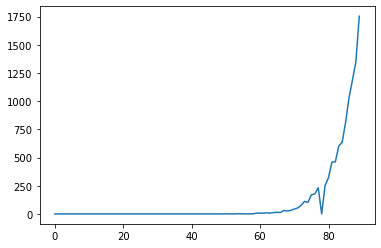

In [2]:
plt.plot(fullHouseEx)
plt.xlabel("Number turns to win full house")
plt.ylabel("Frequency")
plt.show()

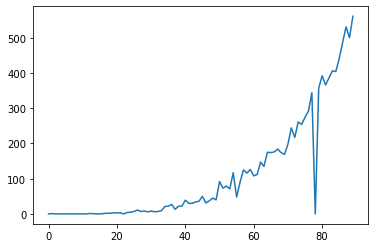

In [3]:
plt.plot(topLineEx)

plt.show()

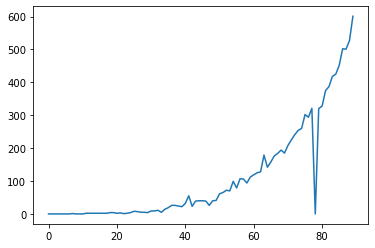

In [4]:
plt.plot(middleLineEx)

plt.show()

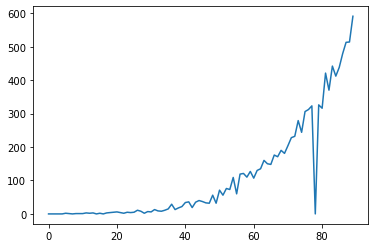

In [5]:
plt.plot(bottomLineEx)
plt.show()

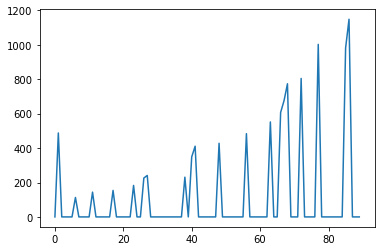

In [6]:
plt.plot(fourCornersEx)
plt.show()

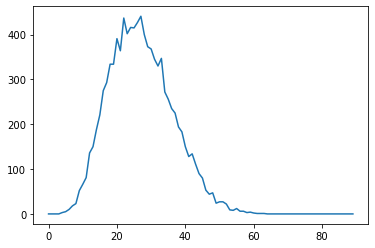

In [7]:
plt.plot(earlyFiveEx)
plt.show()